In [1]:
import numpy as np
import pandas as pd
branches = pd.read_csv('/kaggle/input/energy-systems-hw2/datasets/branches_ieee118_subset.csv')
buses = pd.read_csv('/kaggle/input/energy-systems-hw2/datasets/buses_ieee118_subset.csv')
generators = pd.read_csv('/kaggle/input/energy-systems-hw2/datasets/generators_ieee118_subset.csv')

In [2]:
branches

,fbus,tbus,r,x,rateA,ratio
0,1,2,0.03030,0.09990,175,1.0
1,1,3,0.01290,0.04240,175,1.0
2,4,5,0.00176,0.00798,175,1.0
3,3,5,0.02410,0.10800,175,1.0
4,5,6,0.01190,0.05400,175,1.0
...,...,...,...,...,...,...
205,68,116,0.00070,0.00810,440,1.0
206,68,116,0.00070,0.00810,440,1.0
207,12,117,0.03290,0.14000,175,1.0
208,75,118,0.01450,0.04810,175,1.0


In [3]:
branches.rateA.unique()

array([175, 440, 550, 200, 300, 350, 400])

In [4]:
buses

,bus_i,Pd,baseKV
0,1,51,138
1,2,20,138
2,3,39,138
3,4,39,138
4,5,0,138
...,...,...,...
113,114,8,138
114,115,22,138
115,116,184,138
116,117,20,138


In [5]:
generators

,bus,mBase,c2,c1,c0,Pmax,Pmin
0,1,100,0.010000,40,0,100.0,0
1,4,100,0.010000,40,0,100.0,0
2,6,100,0.010000,40,0,100.0,0
3,8,100,0.010000,40,0,100.0,0
4,10,100,0.022222,20,0,550.0,0
5,12,100,0.117647,20,0,185.0,0
6,15,100,0.010000,40,0,100.0,0
7,18,100,0.010000,40,0,100.0,0
8,19,100,0.010000,40,0,100.0,0
9,24,100,0.010000,40,0,100.0,0


In [9]:
d = np.array(buses.Pd) / 100
d

array([0.51, 0.2 , 0.39, 0.39, 0.  , 0.52, 0.19, 0.28, 0.  , 0.  , 0.7 ,
       0.47, 0.34, 0.14, 0.9 , 0.25, 0.11, 0.6 , 0.45, 0.18, 0.14, 0.1 ,
       0.07, 0.13, 0.  , 0.  , 0.71, 0.17, 0.24, 0.  , 0.43, 0.59, 0.23,
       0.59, 0.33, 0.31, 0.  , 0.  , 0.27, 0.66, 0.37, 0.96, 0.18, 0.16,
       0.53, 0.28, 0.34, 0.2 , 0.87, 0.17, 0.17, 0.18, 0.23, 1.13, 0.63,
       0.84, 0.12, 0.12, 2.77, 0.78, 0.  , 0.77, 0.  , 0.  , 0.  , 0.39,
       0.28, 0.  , 0.  , 0.66, 0.  , 0.12, 0.06, 0.68, 0.47, 0.68, 0.61,
       0.71, 0.39, 1.3 , 0.  , 0.54, 0.2 , 0.11, 0.24, 0.21, 0.  , 0.48,
       0.  , 1.63, 0.1 , 0.65, 0.12, 0.3 , 0.42, 0.38, 0.15, 0.34, 0.42,
       0.37, 0.22, 0.05, 0.23, 0.38, 0.31, 0.43, 0.5 , 0.02, 0.08, 0.39,
       0.  , 0.68, 0.06, 0.08, 0.22, 1.84, 0.2 , 0.33])

In [13]:
c0 = np.array(generators.c0)
c0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
f_max = np.array(branches.rateA)/100
f_max

array([1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 4.4 , 4.4 , 5.5 , 4.4 , 4.4 ,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 2.  , 1.75, 1.75, 1.75, 1.75, 3.  , 4.4 , 4.4 ,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 3.5 , 1.75, 1.75, 4.4 , 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 1.75, 4.  , 4.4 , 2.  , 4.4 , 4.4 , 1.75, 1.75,
       1.75, 1.75, 2.  , 1.75, 4.4 , 4.4 , 1.75, 1.75, 3.5 , 1.75, 1.75,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 4.4 , 4.4 ,
       2.  , 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.

In [16]:
f_min = - f_max
f_min

array([-1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -4.4 , -4.4 , -5.5 ,
       -4.4 , -4.4 , -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -2.  , -1.75, -1.75, -1.75, -1.75, -3.  , -4.4 , -4.4 , -1.75,
       -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75, -1.75, -1.75, -3.5 , -1.75, -1.75, -4.4 , -1.75,
       -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75, -1.75, -1.75, -4.  , -4.4 , -2.  , -4.4 , -4.4 ,
       -1.75, -1.75, -1.75, -1.75, -2.  , -1.75, -4.4 , -4.4 , -1.75,
       -1.75, -3.5 , -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
       -1.75, -1.75,

In [17]:
# Incidence Matrix Calculation
E = len(branches['fbus'])
N = max(branches['tbus'])
M = [[0 for _ in range(N)] for _ in range(E)]
fbus = list(branches['fbus'])
tbus = list(branches['tbus'])

for edge_num in range(E):
    node1 = fbus[edge_num]
    node2 = tbus[edge_num]
    M[edge_num][node1-1] = -1
    M[edge_num][node2-1] = 1
M = np.array(M)
M = M.T
print(M)

[[-1 -1  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  1]]


In [18]:
M.shape

(118, 210)

In [19]:
# b_e calculation
transformer_turn_ratios = list(branches['ratio'])
reactance = list(branches['x'])
susceptances = [0 for _ in range(E)]

for edge_num in range(E):
    susceptances[edge_num] = 1/(transformer_turn_ratios[edge_num]*reactance[edge_num])
b = np.array(susceptances)
    
print(b)

[ 10.01001001  23.58490566 125.31328321   9.25925926  18.51851852
  48.07692308  16.39344262  16.39344262  38.02353657  15.52795031
  15.52795031  14.53488372  14.6627566   51.02040816  16.23376623
   6.25        29.41176471  13.67989056  14.14427157   4.09165303
   5.12820513  11.99040767  11.4416476   11.4416476    5.55247085
  19.8019802   20.28397566   8.54700855  25.38071066  11.77856302
  10.30927835   6.28930818  10.16260163  10.16260163   6.25
   6.25        27.26876091   3.06748466   3.06748466  11.69590643
  10.60445387  26.84707904  19.84126984  11.62790698   6.39795266
  30.21148036   4.33651344   4.33651344  10.15228426  13.24503311
   8.03858521   4.048583    98.03921569  20.12072435   7.04225352
  37.31343284  53.19148936  53.19148936  28.52049911   9.43396226
   5.95238095  18.51851852  16.52892562  20.5338809    5.46448087
   7.40740741   4.07497963   5.94883998  11.09877913   7.37463127
   3.93700787   3.93700787   5.29100529  16.           3.09597523
   3.09597523   

In [20]:
# Susceptance Matrix calculation
B = M @ np.diag(b) @ M.T
print(B)

[[ 33.59491567 -10.01001001 -23.58490566 ...   0.           0.
    0.        ]
 [-10.01001001  26.24377624   0.         ...   0.           0.
    0.        ]
 [-23.58490566   0.          39.09416492 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 246.91358025   0.
    0.        ]
 [  0.           0.           0.         ...   0.           7.14285714
    0.        ]
 [  0.           0.           0.         ...   0.           0.
   39.17237373]]


In [21]:
B.shape

(118, 118)

In [22]:
b_diag = np.diag(b)

In [23]:
b_diag

array([[ 10.01001001,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  23.58490566,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 125.31328321, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   7.14285714,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         20.79002079,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  18.38235294]])

In [24]:
!pip install cvxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 40.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 53.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.2/296.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
librosa 0.10.0 requ

In [25]:
import cvxpy as cp

In [26]:
Egen = np.zeros((118, 54))
for idx, bus in enumerate(generators.bus):
    Egen[bus-1, idx] = 1
Egen

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
Egen.shape

(118, 54)

In [28]:
C2 = np.diag(generators.c2)
C2

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [29]:
c1 = np.array(generators.c1)
c1

array([40, 40, 40, 40, 20, 20, 40, 40, 40, 40, 20, 20, 40, 20, 40, 40, 40,
       40, 40, 20, 20, 20, 40, 40, 20, 20, 40, 20, 20, 20, 40, 40, 40, 40,
       40, 40, 20, 40, 20, 20, 40, 40, 40, 40, 20, 20, 40, 40, 40, 40, 20,
       40, 40, 40])

In [30]:
c0 = np.array(generators.c0)
c0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
C2

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [32]:
p_max = np.array(generators.Pmax) / 100
p_min = np.array(generators.Pmin) / 100

In [33]:
p_min

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [34]:
import cvxpy as cp
import numpy as np


n = 118
m = 210
p = cp.Variable(54)
theta = cp.Variable(n)

constraints = [
    Egen @ p - d == B @ theta,
    p <= p_max,
    p >= p_min,
    f_min <= b_diag @ M.T @ theta,
    f_max >= b_diag @ M.T @ theta,
]

objective = cp.Minimize(p.T @ C2 @ p + c1 @ p + np.ones((1, len(c0))) @ c0)

problem = cp.Problem(objective, constraints)
problem.solve()

852.5137715127258

In [35]:
B

array([[ 33.59491567, -10.01001001, -23.58490566, ...,   0.        ,
          0.        ,   0.        ],
       [-10.01001001,  26.24377624,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-23.58490566,   0.        ,  39.09416492, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 246.91358025,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          7.14285714,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  39.17237373]])

In [36]:
print(f'Optimal Value: {problem.value}')
print(f'Value of power Injection p is: {p.value}')
print(f'A dual solution corresponding to the 1st constraints is : {problem.constraints[0].dual_value}')
print(f'A dual solution corresponding to the 2nd constraints is : {problem.constraints[1].dual_value}')
print(f'A dual solution corresponding to the 3rd constraints is : {problem.constraints[2].dual_value}')
print(f'A dual solution corresponding to the 4th constraints is : {problem.constraints[3].dual_value}')
print(f'A dual solution corresponding to the 5th constraints is : {problem.constraints[4].dual_value}')

Optimal Value: 852.5137715127258
Value of power Injection p is: [-8.91289139e-15 -8.72964628e-15 -8.84932198e-15 -8.10221358e-15
  4.40192265e+00  8.31472614e-01 -6.89352239e-15 -6.81768128e-15
 -6.66502576e-15 -4.30869427e-15  2.15192656e+00  3.07144087e+00
 -6.98167114e-15  6.84715782e-02 -6.86237912e-15 -4.29380044e-15
 -4.35584899e-15 -3.00567438e-15 -1.57091787e-15  1.85864502e-01
  1.99564113e+00  4.69577703e-01  1.53339718e-15  1.51971578e-15
  1.51638710e+00  1.56532057e+00  1.53627398e-15  3.82534358e+00
  3.83497831e+00  5.05036317e+00  1.04106081e-15 -1.75771678e-15
  6.07642988e-16  1.99258313e-15  2.94129925e-15  3.77653465e-15
  4.67062640e+00  2.53656817e-15  3.72576680e-02  5.49138081e+00
  2.78366712e-15  5.26398907e-15  8.92495852e-15  6.65695003e-15
  2.49850685e+00  3.96588391e-01  8.42645838e-15  8.57068088e-15
  8.57073570e-15  8.93801481e-15  3.56929550e-01  8.99024666e-15
 -6.93381175e-15  2.16713882e-15]
A dual solution corresponding to the 1st constraints is :

In [37]:
# All generators not binding for maximum power
shadow_prices = problem.constraints[2].dual_value.flatten()
idx = np.where(shadow_prices == 0)[0]
idx

array([ 4,  5, 10, 11, 13, 19, 20, 21, 24, 25, 27, 28, 29, 36, 38, 39, 44,
       45, 50])

In [38]:
problem.constraints[3].dual_value.flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
# All transmission lines not binding at maximum since the dual for the constraint is 0
# This gives the list of the indexes of the non binding transmission lines for the minimum flow constraint
shadow_prices_flow = problem.constraints[3].dual_value.flatten()
idx = np.where(shadow_prices_flow == 0)[0]
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [40]:
problem.constraints[2].dual_value[problem.constraints[2].dual_value != 0].var()

7.725804869077628e-06

In [35]:
np.var(problem.constraints[2].dual_value)

89.44561109681493

In [36]:
np.var(problem.constraints[0].dual_value)

8.47973782315474e-06

In [37]:
np.var(p.value)

2.280492946446413

In [44]:
B.shape

(118, 118)

In [45]:
theta.shape

(118,)

In [46]:
d.shape

(118,)

In [47]:
M.T.shape

(210, 118)

In [49]:
b.shape

(54,)

In [50]:
np.diag(b).shape

(54, 54)

In [51]:
M.T.shape

(210, 118)

In [49]:
problem.constraints[0].dual_value.shape

(118,)

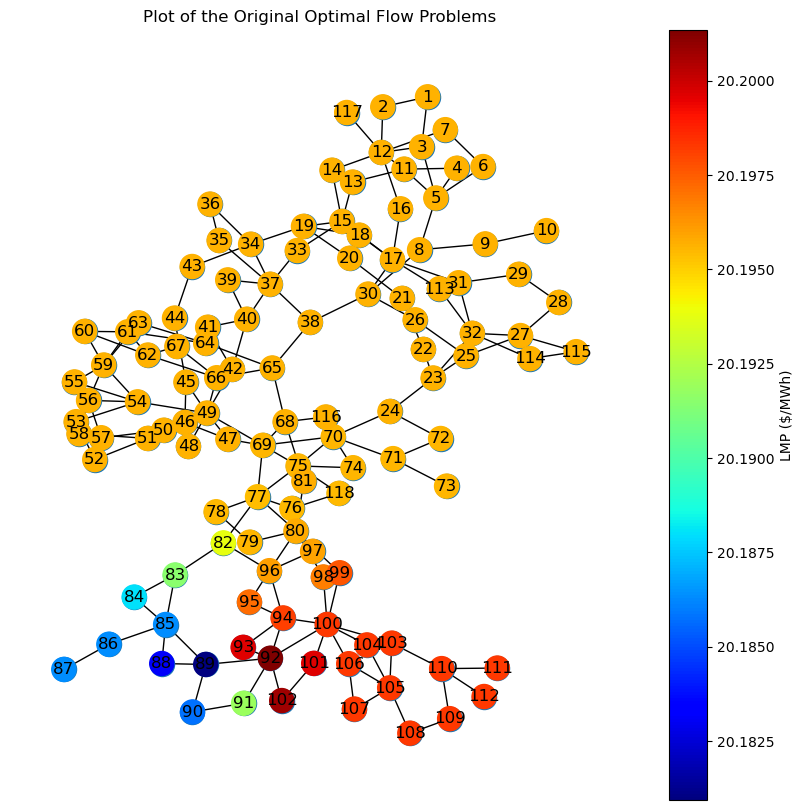

In [41]:
!pip install networkx
import matplotlib.pyplot as plt
import networkx as nx # !pip install networkx import matplotlib.pyplot as plt
branches = pd.read_csv("/kaggle/input/energy-systems-hw2/datasets/branches_ieee118_subset.csv")
G = nx.Graph()
G.add_edges_from([(fbus,tbus) for fbus,tbus in zip(branches.fbus,branches.tbus)])
N = len(G.nodes())
#node_color = np.random.rand(N,1)*100 # You should provide a list of electricity prices. The order should match that of G .nodes()
node_color = -problem.constraints[0].dual_value
fig = plt.figure(figsize=(10,10))
plt.title('Plot of the Original Optimal Flow Problems')
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True) 
nc = nx.draw_networkx_nodes(G, pos=nx.kamada_kawai_layout(G),nodelist=list(G.nodes()), node_color=node_color , cmap=plt.cm.jet)
plt.colorbar(nc,label = "LMP (\$/MWh)")
fig.savefig('original_flow.png')

In [42]:
f_max_new = f_max/3
f_min_new = f_min/3

n = 118
m = 210
p = cp.Variable(54)
theta = cp.Variable(n)

constraints = [
    Egen @ p - d == B @ theta,
    p <= p_max,
    p >= p_min,
    f_min_new <= b_diag @ M.T @ theta,
    f_max_new >= b_diag @ M.T @ theta,
]

objective = cp.Minimize(p.T @ C2 @ p + c1 @ p + np.ones((1, len(c0))) @ c0)

problem_2 = cp.Problem(objective, constraints)
problem_2.solve()

934.0758104362966

In [43]:
print(f'Optimal Value: {problem_2.value}')
print(f'Value of power Injection p is: {p.value}')
print(f'A dual solution corresponding to the 1st constraints is : {problem_2.constraints[0].dual_value}')
print(f'A dual solution corresponding to the 2nd constraints is : {problem_2.constraints[1].dual_value}')
print(f'A dual solution corresponding to the 3rd constraints is : {problem_2.constraints[2].dual_value}')
print(f'A dual solution corresponding to the 4th constraints is : {problem_2.constraints[3].dual_value}')
print(f'A dual solution corresponding to the 5th constraints is : {problem_2.constraints[4].dual_value}')

Optimal Value: 934.0758104362966
Value of power Injection p is: [ 3.12249619e-07  5.47436730e-02  3.57328776e-07 -8.24063940e-08
  1.57525159e+00  1.85000020e+00 -2.78100395e-07  9.99999582e-01
  3.84842306e-01 -5.49726259e-07  2.80583295e+00  5.71432617e-01
 -3.28168935e-07  1.06999973e+00 -4.10484446e-07  4.78105630e-07
  7.79535621e-01  6.90535105e-01 -1.04099108e-06  1.09364346e+00
  3.04000023e+00  1.48000015e+00  1.45239321e-07  1.48169399e-07
  2.55000008e+00  2.05862158e+00  3.94487421e-08  2.38476625e+00
  2.34959594e+00  4.67478610e+00 -8.84819708e-07 -7.10687481e-07
 -8.56800408e-07 -1.22641641e-06  1.33385006e-01  1.87663116e-01
  2.51233676e+00  1.10264863e-07  6.66667088e-01  2.34151024e+00
  6.61510567e-01  2.63877793e-07  6.96529219e-07  3.59889497e-07
  3.52000045e+00  1.40000046e+00  4.67494291e-07  4.68781802e-07
  4.68970036e-07  4.88919664e-07  5.83339984e-01  4.89368344e-07
 -5.63036143e-07  1.12663864e-07]
A dual solution corresponding to the 1st constraints is :

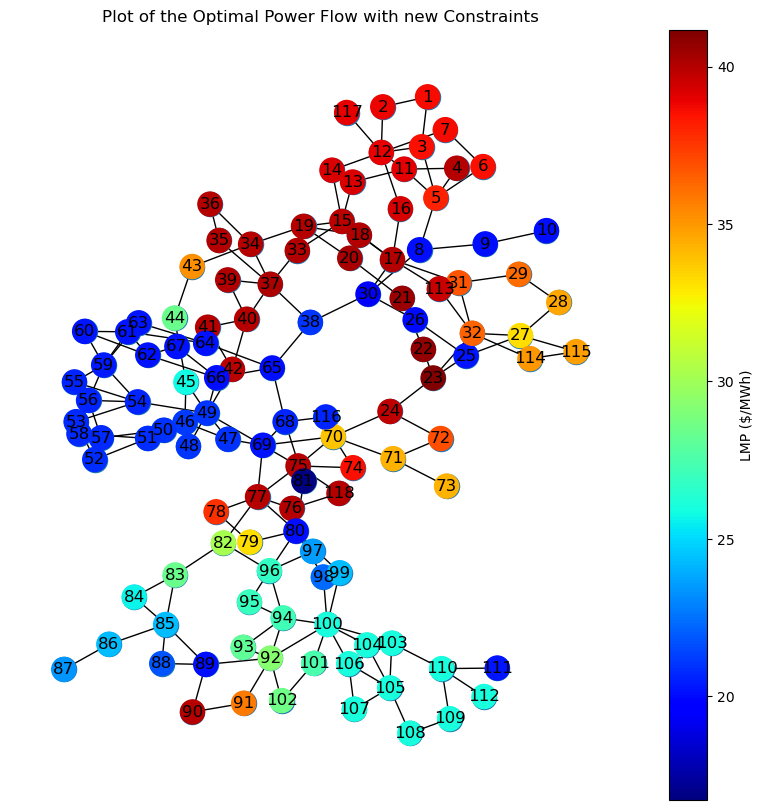

In [44]:
import matplotlib.pyplot as plt
import networkx as nx # !pip install networkx import matplotlib.pyplot as plt
branches = pd.read_csv("/kaggle/input/energy-systems-hw2/datasets/branches_ieee118_subset.csv")
G = nx.Graph()
G.add_edges_from([(fbus,tbus) for fbus,tbus in zip(branches.fbus,branches.tbus)])
N = len(G.nodes())
#node_color = np.random.rand(N,1)*100 # You should provide a list of electricity prices. The order should match that of G .nodes()
node_color = -problem_2.constraints[0].dual_value
fig = plt.figure(figsize=(10,10))
plt.title('Plot of the Optimal Power Flow with new Constraints')
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True) 
nc = nx.draw_networkx_nodes(G, pos=nx.kamada_kawai_layout(G),nodelist=list(G.nodes()), node_color=node_color , cmap=plt.cm.jet)
plt.colorbar(nc,label = "LMP (\$/MWh)")
fig.savefig('new_flow.png')

# Wind Farm added at node 90

In [42]:
C2.shape

(54, 54)

In [45]:
generators.loc[40.5] = [90, 100, 0, 0, 0, 50, 0]

In [46]:
generators = generators.sort_index().reset_index(drop=True)

In [47]:
generators

,bus,mBase,c2,c1,c0,Pmax,Pmin
0,1,100,0.010000,40,0,100.0,0
1,4,100,0.010000,40,0,100.0,0
2,6,100,0.010000,40,0,100.0,0
3,8,100,0.010000,40,0,100.0,0
4,10,100,0.022222,20,0,550.0,0
5,12,100,0.117647,20,0,185.0,0
6,15,100,0.010000,40,0,100.0,0
7,18,100,0.010000,40,0,100.0,0
8,19,100,0.010000,40,0,100.0,0
9,24,100,0.010000,40,0,100.0,0


In [48]:
c2_new = np.array(generators.c2)
c1_new = np.array(generators.c1)
c0_new = np.array(generators.c0)

p_max_new = np.array(generators.Pmax)/100
p_min_new = np.array(generators.Pmin)/100

In [49]:
c2_new

array([0.01      , 0.01      , 0.01      , 0.01      , 0.02222222,
       0.11764706, 0.01      , 0.01      , 0.01      , 0.01      ,
       0.04545455, 0.03184713, 0.01      , 1.42857143, 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.52631579,
       0.04901961, 0.20833333, 0.01      , 0.01      , 0.06451613,
       0.0625    , 0.01      , 0.02557545, 0.0255102 , 0.01936483,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.02096436, 0.01      , 2.5       , 0.01647447,
       0.01      , 0.        , 0.01      , 0.01      , 0.01      ,
       0.03968254, 0.25      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.27777778, 0.01      , 0.01      , 0.01      ])

In [50]:
C2_new = np.diag(c2_new)
C2_new

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [51]:
C2

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [52]:
p_max_new

array([1.   , 1.   , 1.   , 1.   , 5.5  , 1.85 , 1.   , 1.   , 1.   ,
       1.   , 3.2  , 4.14 , 1.   , 1.07 , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.19 , 3.04 , 1.48 , 1.   , 1.   , 2.55 , 2.6  , 1.   ,
       4.91 , 4.92 , 8.052, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       5.77 , 1.   , 1.04 , 7.07 , 1.   , 0.5  , 1.   , 1.   , 1.   ,
       3.52 , 1.4  , 1.   , 1.   , 1.   , 1.   , 1.36 , 1.   , 1.   ,
       1.   ])

In [53]:
p_min_new

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [54]:
Egen_new = np.zeros((118, 55))
for idx, bus in enumerate(generators.bus):
    Egen_new[bus-1, idx] = 1
Egen_new

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
n = 118
m = 210
p = cp.Variable(55)
theta = cp.Variable(n)

constraints = [
    Egen_new @ p - d == B @ theta,
    p <= p_max_new,
    p >= p_min_new,
    f_min_new <= b_diag @ M.T @ theta,
    f_max_new >= b_diag @ M.T @ theta,
]

objective = cp.Minimize(p.T @ C2_new @ p + c1_new @ p + np.ones((1, len(c0_new))) @ c0_new)

problem_3 = cp.Problem(objective, constraints)
problem_3.solve()

914.0716010829331

In [56]:
print(f'Optimal Value: {problem_3.value}')
print(f'Value of power Injection p is: {p.value}')
print(f'A dual solution corresponding to the 1st constraints is : {problem_3.constraints[0].dual_value}')
print(f'A dual solution corresponding to the 2nd constraints is : {problem_3.constraints[1].dual_value}')
print(f'A dual solution corresponding to the 3rd constraints is : {problem_3.constraints[2].dual_value}')
print(f'A dual solution corresponding to the 4th constraints is : {problem_3.constraints[3].dual_value}')
print(f'A dual solution corresponding to the 5th constraints is : {problem_3.constraints[4].dual_value}')

Optimal Value: 914.0716010829331
Value of power Injection p is: [ 3.12477872e-07  5.47436776e-02  3.57529462e-07 -8.25003038e-08
  1.57525153e+00  1.85000020e+00 -2.77315265e-07  9.99999583e-01
  3.84842105e-01 -5.85816663e-07  2.80583287e+00  5.71432811e-01
 -3.35937587e-07  1.06999973e+00 -4.21086568e-07  4.83274835e-07
  7.79535226e-01  6.90535455e-01 -1.05522855e-06  1.09364319e+00
  3.04000023e+00  1.48000015e+00  1.45050009e-07  1.47931132e-07
  2.55000008e+00  2.05862148e+00  4.05199538e-08  2.38476598e+00
  2.34959578e+00  4.67479054e+00 -9.55013436e-07 -7.63095863e-07
 -9.24110477e-07 -1.32433384e-06  1.33389683e-01  1.87653680e-01
  2.51233524e+00  1.18850526e-07  6.66667140e-01  2.34151204e+00
  1.61510849e-01  4.99999976e-01  2.85175976e-07  7.52963726e-07
  3.89952790e-07  3.52000049e+00  1.40000050e+00  5.06083733e-07
  5.07482934e-07  5.07681666e-07  5.29377437e-07  5.83340614e-01
  5.29860786e-07 -5.63425892e-07  1.21157054e-07]
A dual solution corresponding to the 1st 

In [57]:
p.value.shape

(55,)

In [59]:
p.value[41]

0.4999999760094896

In [60]:
# For node 90, constraint p <= p_max is binding which means that it does inject the maximum power
problem_3.constraints[1].dual_value[41]

40.003230793259775

In [61]:
-problem_2.constraints[0].dual_value[90]

35.74858696838217

In [62]:
-problem_3.constraints[0].dual_value[90]

35.742553855270444

In [63]:
p.value.shape

(55,)

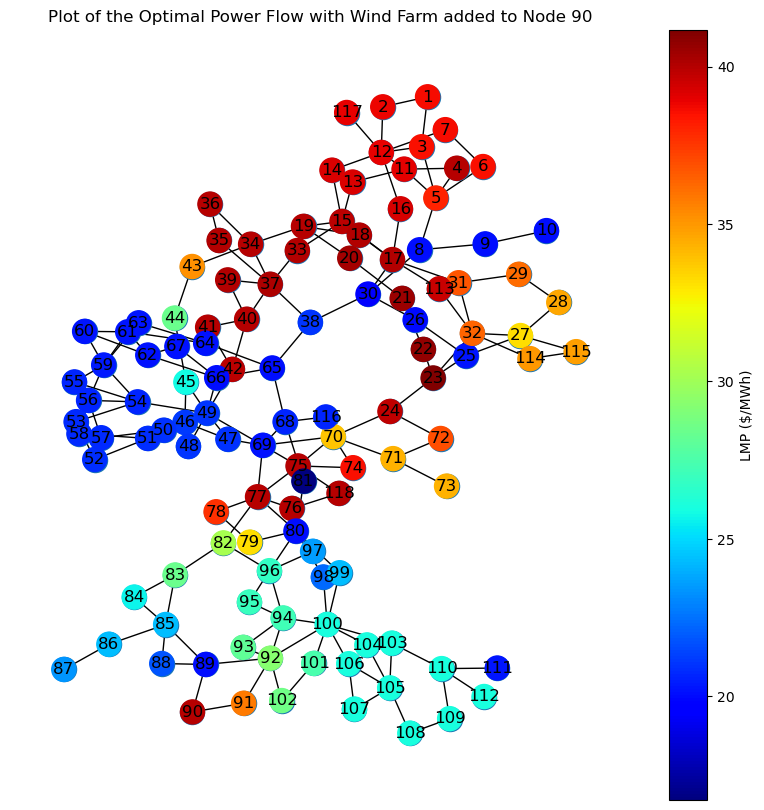

In [64]:
import matplotlib.pyplot as plt
import networkx as nx # !pip install networkx import matplotlib.pyplot as plt
branches = pd.read_csv("/kaggle/input/energy-systems-hw2/datasets/branches_ieee118_subset.csv")
G = nx.Graph()
G.add_edges_from([(fbus,tbus) for fbus,tbus in zip(branches.fbus,branches.tbus)])
N = len(G.nodes())
#node_color = np.random.rand(N,1)*100 # You should provide a list of electricity prices. The order should match that of G .nodes()
node_color = -problem_3.constraints[0].dual_value
fig = plt.figure(figsize=(10,10))
plt.title('Plot of the Optimal Power Flow with Wind Farm added to Node 90')
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True) 
nc = nx.draw_networkx_nodes(G, pos=nx.kamada_kawai_layout(G),nodelist=list(G.nodes()), node_color=node_color , cmap=plt.cm.jet)
plt.colorbar(nc,label = "LMP (\$/MWh)")
fig.savefig('new_flow_after_adding_wind_farm_node_90_2.png')

It can be observed that adding the wind farm to node 90 does not reduce the price of node 90 and its neighboring nodes

In [67]:
d[89] += 0.5
d[89]

2.13

In [68]:
d 

array([0.51, 0.2 , 0.39, 0.39, 0.  , 0.52, 0.19, 0.28, 0.  , 0.  , 0.7 ,
       0.47, 0.34, 0.14, 0.9 , 0.25, 0.11, 0.6 , 0.45, 0.18, 0.14, 0.1 ,
       0.07, 0.13, 0.  , 0.  , 0.71, 0.17, 0.24, 0.  , 0.43, 0.59, 0.23,
       0.59, 0.33, 0.31, 0.  , 0.  , 0.27, 0.66, 0.37, 0.96, 0.18, 0.16,
       0.53, 0.28, 0.34, 0.2 , 0.87, 0.17, 0.17, 0.18, 0.23, 1.13, 0.63,
       0.84, 0.12, 0.12, 2.77, 0.78, 0.  , 0.77, 0.  , 0.  , 0.  , 0.39,
       0.28, 0.  , 0.  , 0.66, 0.  , 0.12, 0.06, 0.68, 0.47, 0.68, 0.61,
       0.71, 0.39, 1.3 , 0.  , 0.54, 0.2 , 0.11, 0.24, 0.21, 0.  , 0.48,
       0.  , 2.13, 0.1 , 0.65, 0.12, 0.3 , 0.42, 0.38, 0.15, 0.34, 0.42,
       0.37, 0.22, 0.05, 0.23, 0.38, 0.31, 0.43, 0.5 , 0.02, 0.08, 0.39,
       0.  , 0.68, 0.06, 0.08, 0.22, 1.84, 0.2 , 0.33])

In [69]:
n = 118
m = 210
p = cp.Variable(55)
theta = cp.Variable(n)

constraints = [
    Egen_new @ p - d == B @ theta,
    p <= p_max_new,
    p >= p_min_new,
    f_min_new <= b_diag @ M.T @ theta,
    f_max_new >= b_diag @ M.T @ theta,
]

objective = cp.Minimize(p.T @ C2_new @ p + c1_new @ p + np.ones((1, len(c0_new))) @ c0_new)

problem_final = cp.Problem(objective, constraints)
problem_final.solve()

934.0758354516872

In [70]:
print(f'Optimal Value: {problem_final.value}')
print(f'Value of power Injection p is: {p.value}')
print(f'A dual solution corresponding to the 1st constraints is : {problem_final.constraints[0].dual_value}')
print(f'A dual solution corresponding to the 2nd constraints is : {problem_final.constraints[1].dual_value}')
print(f'A dual solution corresponding to the 3rd constraints is : {problem_final.constraints[2].dual_value}')
print(f'A dual solution corresponding to the 4th constraints is : {problem_final.constraints[3].dual_value}')
print(f'A dual solution corresponding to the 5th constraints is : {problem_final.constraints[4].dual_value}')

Optimal Value: 934.0758354516872
Value of power Injection p is: [ 3.09503707e-07  5.47432795e-02  3.55339123e-07 -8.38575012e-08
  1.57525181e+00  1.85000020e+00 -2.96140459e-07  9.99999559e-01
  3.84844726e-01 -5.46556317e-07  2.80583281e+00  5.71432824e-01
 -3.39130397e-07  1.06999972e+00 -4.23353644e-07  4.96634804e-07
  7.79532758e-01  6.90536038e-01 -1.07812592e-06  1.09364362e+00
  3.04000024e+00  1.48000016e+00  1.51802131e-07  1.54910476e-07
  2.55000008e+00  2.05862136e+00  3.97857821e-08  2.38476630e+00
  2.34959618e+00  4.67478468e+00 -8.64553144e-07 -6.99371363e-07
 -8.37997658e-07 -1.19667934e-06  1.33383435e-01  1.87665999e-01
  2.51233729e+00  1.07768857e-07  6.66667065e-01  2.34150969e+00
  6.61510516e-01  4.99999978e-01  2.57310586e-07  6.79526802e-07
  3.50481233e-07  3.52000044e+00  1.40000045e+00  4.55584622e-07
  4.56835744e-07  4.57022821e-07  4.76397491e-07  5.83339758e-01
  4.76836523e-07 -5.92856134e-07  1.10525248e-07]
A dual solution corresponding to the 1st 

In [71]:
-problem_final.constraints[0].dual_value[90]

35.74858596053245

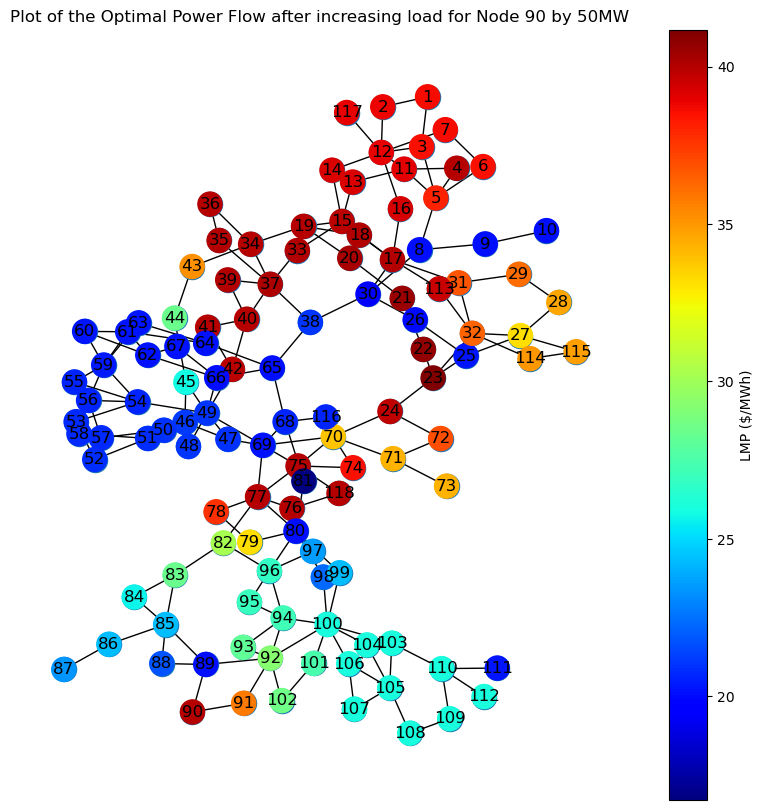

In [72]:
import matplotlib.pyplot as plt
import networkx as nx # !pip install networkx import matplotlib.pyplot as plt
branches = pd.read_csv("/kaggle/input/energy-systems-hw2/datasets/branches_ieee118_subset.csv")
G = nx.Graph()
G.add_edges_from([(fbus,tbus) for fbus,tbus in zip(branches.fbus,branches.tbus)])
N = len(G.nodes())
#node_color = np.random.rand(N,1)*100 # You should provide a list of electricity prices. The order should match that of G .nodes()
node_color = -problem_final.constraints[0].dual_value
fig = plt.figure(figsize=(10,10))
plt.title('Plot of the Optimal Power Flow after increasing load for Node 90 by 50MW')
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True) 
nc = nx.draw_networkx_nodes(G, pos=nx.kamada_kawai_layout(G),nodelist=list(G.nodes()), node_color=node_color , cmap=plt.cm.jet)
plt.colorbar(nc,label = "LMP (\$/MWh)")
fig.savefig('new_flow_after_increasing_load_by_50mw_90_2.png')

In [73]:
!pip install pandapower
import pandapower
import pandapower.networks

net_dc = pandapower.networks.case118()
net_ac = pandapower.networks.case118()

pandapower.rundcopp(net_dc, numba=False, verbose=False)
pandapower.runopp(net_ac, numba=False, verbose=False, ac=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 47.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for pandapower: filename=pandapower-2.11.1-py3-none-any.whl size=6164004 sha256=07cd1a5b55774502756e896d4876e48a2c9975fffe081554359f2a8135c8db59
  Stored in directory: /root/.cache/pip/wheels/6c/de/68/92101d0c90e5c06814821ccfd29f90c45718270f1646f2df52
Successfully built pandapower


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


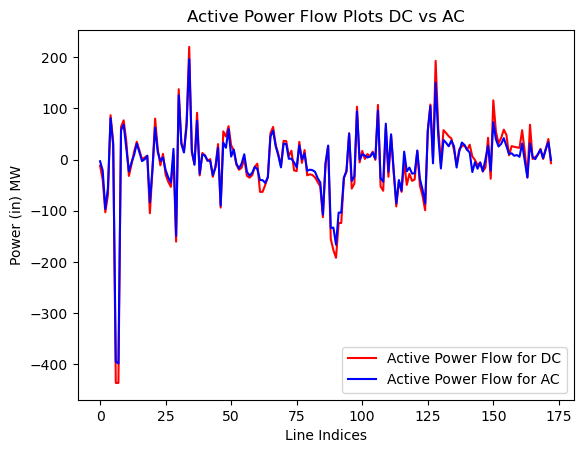

In [74]:
import matplotlib.pyplot as plt
line = np.linspace(0, 172, 173)
fig = plt.figure()
plt.title('Active Power Flow Plots DC vs AC')
plt.plot(line, net_dc.res_line['p_from_mw'], 'r',label='Active Power Flow for DC')
plt.plot(line, net_ac.res_line['p_from_mw'], 'b',label='Active Power Flow for AC')
plt.ylabel('Power (in) MW')
plt.xlabel('Line Indices')
plt.legend()
fig.savefig('ac_vs_dc_active_power_flow.png')
plt.show()

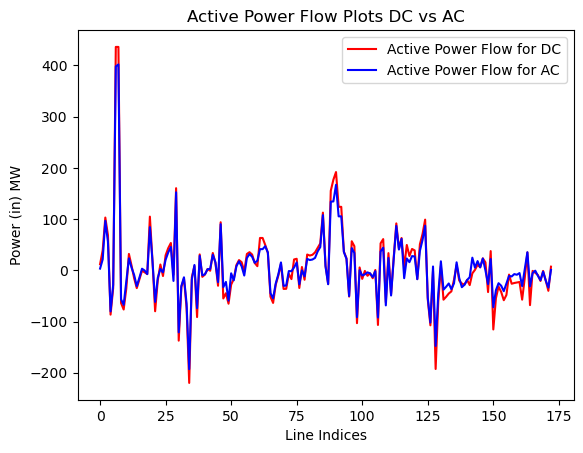

In [75]:
line = np.linspace(0, 172, 173)
fig = plt.figure()
plt.title('Active Power Flow Plots DC vs AC')
plt.plot(line, net_dc.res_line['p_to_mw'], 'r',label='Active Power Flow for DC')
plt.plot(line, net_ac.res_line['p_to_mw'], 'b',label='Active Power Flow for AC')
plt.ylabel('Power (in) MW')
plt.xlabel('Line Indices')
plt.legend()
fig.savefig('ac_vs_dc_active_power_flow_to_bus.png')
plt.show()

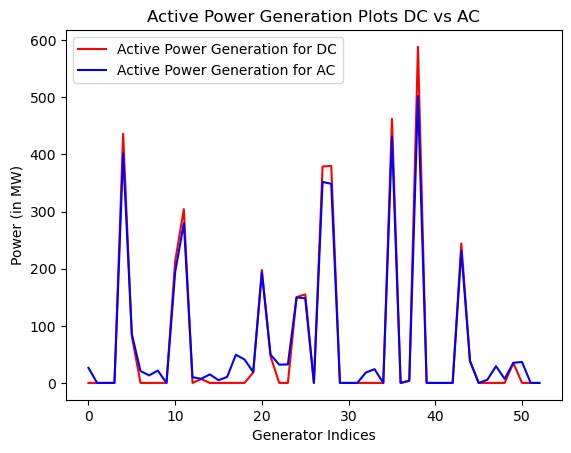

In [76]:
gen = np.linspace(0, 52, 53)
fig = plt.figure()
plt.title('Active Power Generation Plots DC vs AC')
plt.plot(gen, net_dc.res_gen['p_mw'], 'r',label='Active Power Generation for DC')
plt.plot(gen, net_ac.res_gen['p_mw'], 'b',label='Active Power Generation for AC')
plt.ylabel('Power (in MW)')
plt.xlabel('Generator Indices')
plt.legend()
fig.savefig('ac_vs_dc_active_power_generation.png')
plt.show()